In [1]:
%load_ext autoreload
%autoreload 2
%cd /anhvth5/vision-projects/DiffSynth-Studio


/anhvth5/vision-projects/DiffSynth-Studio


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from examples.ExVideo.ExVideo_svd_train_custom import *
from diffsynth.models.svd_unet import SVDUNet, PushBlock, PopBlock, PopMixBlock
from avcv.all import *
from fastcore.all import patch

from diffsynth import save_video, ModelManager, SVDVideoPipeline, HunyuanDiTImagePipeline
from diffsynth import ModelManager
import torch, os

from diffsynth.pipelines_custom import SVDVideoPipelineCustom

In [14]:
args = parse_args().parse_known_args()[0]
args.num_frames = 24
args.steps_per_epoch = 500
args.pretrained_path =  "models/stable_video_diffusion/svd_xt.safetensors"
args.height = 512
args.width = 320
ds_path = './datasets/tiktokdance/'
steps_per_epoch = 500
dataset = TextVideoDataset(
        ds_path,
        os.path.join(ds_path, "metadata_test.json"),
        training_shapes=[(args.num_frames, 1, args.num_frames, 512, 384)],
        steps_per_epoch=args.steps_per_epoch)

In [13]:
64*5

320

In [4]:
%%time
if not 'pipe' in dir():
    model_manager = ModelManager()
    model_manager.load_models(
        [
         "models/stable_video_diffusion/svd_xt.safetensors",
         # "/anhvth5/vision-projects/DiffSynth-Studio/outputs/models_tiktokdance/lightning_logs/version_1/checkpoints/epoch=9-step=2850-ema.safetensors"
        ]
    )
    
pipe = SVDVideoPipelineCustom.from_model_manager(model_manager)

CPU times: user 43.1 s, sys: 14.1 s, total: 57.2 s
Wall time: 12.2 s


start_frame_id=200


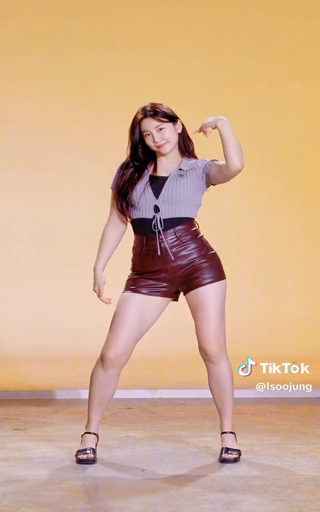

In [5]:
data = dataset.__getitem__(0, 200)
first_frame = dataset.raw_frames[0]
first_frame = Image.fromarray(first_frame)
first_frame.resize((320, 512))

In [6]:
raw_control_frames = dataset.raw_control_frames

In [7]:
frames = data['frames_0'].cuda().float()
control_frames = data['control_frames_0']

In [8]:
save_video(dataset.raw_control_frames, "video_raw.mp4", fps=30)

Saving video: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.66it/s]


In [9]:
with torch.cuda.amp.autocast(), torch.no_grad():
    torch.manual_seed(1)
    video = pipe.__call__(
        input_image=first_frame.resize((args.width, args.height)),
        num_frames=args.num_frames, fps=30, height=args.height, width=args.width,
        motion_bucket_id=127,
        num_inference_steps=50,
        min_cfg_scale=2, max_cfg_scale=2, contrast_enhance_scale=1.2,
        control_frames=control_frames
    )
save_video(video, "video_controled.mp4", fps=30)

Saving video: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 94.69it/s]


In [15]:
image = Image.open('00139-1870014373.jpeg')
with torch.cuda.amp.autocast(), torch.no_grad():
    torch.manual_seed(1)
    video = pipe.__call__(
        input_image=image.resize((args.width, args.height)),
        num_frames=args.num_frames, fps=30, height=args.height, width=args.width,
        motion_bucket_id=127,
        num_inference_steps=50,
        min_cfg_scale=2, max_cfg_scale=2, contrast_enhance_scale=1.2,
        control_frames=None
    )
save_video(video, "video_controled.mp4", fps=30)

Saving video: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 96.56it/s]
